# **Business Problem**

**As a marketing agency, our primary objective is to maximize the return on investment (ROI) for our clients' advertising campaigns. We have conducted two ad campaigns, one on facebook & the other on Youtube, and we need to determin which platform yields better result in terms of clicks, conversions, and overall cost-effectiveness. By identifying the most effective platform, we can allocate our resources more efficiently and optimize our advertising strategies to deliver better outcomes for business.**

# **Research Question**

#### **Which ad platform is more effective in terms of conversions, clicks, and overall cost-effectiveness?**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import coint
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'C:\Users\omkar\OneDrive\Desktop\python_jupyter\data file\ad_campaign_data.csv')
df.head()

,Date,FB Add Campaign,FB Ad View,FB Ad Click,FB Ad Conversion,Cost Per FB Ad,FB Ad Click Rate,FB Conv. Rate,FB Ad Cost Per Click,Youtube Ad Campaign,YT Ad View,YT Ad Click,YT Ad Conversion,Cost per YT Ad,YT Ad Click Rate,YT Ad Conv. Rate,YT Ad Cost Per Click
0,1/1/2025,FB_Ad_camp,1266,282,11,$144.00,22.27%,11.70%,$0.51,YT_Ad_Camp,2588,189,10,$127.00,7.30%,1.59%,$0.67
1,2/1/2025,FB_Ad_camp,890,60,2,$118.00,6.74%,40.00%,$1.97,YT_Ad_Camp,4384,484,30,$143.00,11.04%,0.83%,$0.30
2,3/1/2025,FB_Ad_camp,4679,498,15,$154.00,10.64%,2.61%,$0.31,YT_Ad_Camp,3592,304,21,$95.00,8.46%,5.92%,$0.31
3,4/1/2025,FB_Ad_camp,5181,409,19,$182.00,7.89%,5.38%,$0.44,YT_Ad_Camp,625,365,31,$183.00,58.40%,10.41%,$0.50
4,5/1/2025,FB_Ad_camp,832,354,9,$167.00,42.55%,6.78%,$0.47,YT_Ad_Camp,2384,213,12,$156.00,8.93%,4.23%,$0.73


In [3]:
df.shape

(30, 17)

In [4]:
df.dtypes

Date                    object
FB Add Campaign         object
FB Ad View               int64
FB Ad Click              int64
FB Ad Conversion         int64
Cost Per FB Ad          object
FB Ad Click Rate        object
FB Conv. Rate           object
FB Ad Cost Per Click    object
Youtube Ad Campaign     object
YT Ad View               int64
YT Ad Click              int64
YT Ad Conversion         int64
Cost per YT Ad          object
YT Ad Click Rate        object
YT Ad Conv. Rate        object
YT Ad Cost Per Click    object
dtype: object

In [5]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True,format='mixed')
df.head()

,Date,FB Add Campaign,FB Ad View,FB Ad Click,FB Ad Conversion,Cost Per FB Ad,FB Ad Click Rate,FB Conv. Rate,FB Ad Cost Per Click,Youtube Ad Campaign,YT Ad View,YT Ad Click,YT Ad Conversion,Cost per YT Ad,YT Ad Click Rate,YT Ad Conv. Rate,YT Ad Cost Per Click
0,2025-01-01,FB_Ad_camp,1266,282,11,$144.00,22.27%,11.70%,$0.51,YT_Ad_Camp,2588,189,10,$127.00,7.30%,1.59%,$0.67
1,2025-01-02,FB_Ad_camp,890,60,2,$118.00,6.74%,40.00%,$1.97,YT_Ad_Camp,4384,484,30,$143.00,11.04%,0.83%,$0.30
2,2025-01-03,FB_Ad_camp,4679,498,15,$154.00,10.64%,2.61%,$0.31,YT_Ad_Camp,3592,304,21,$95.00,8.46%,5.92%,$0.31
3,2025-01-04,FB_Ad_camp,5181,409,19,$182.00,7.89%,5.38%,$0.44,YT_Ad_Camp,625,365,31,$183.00,58.40%,10.41%,$0.50
4,2025-01-05,FB_Ad_camp,832,354,9,$167.00,42.55%,6.78%,$0.47,YT_Ad_Camp,2384,213,12,$156.00,8.93%,4.23%,$0.73


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  30 non-null     datetime64[ns]
 1   FB Add Campaign       30 non-null     object        
 2   FB Ad View            30 non-null     int64         
 3   FB Ad Click           30 non-null     int64         
 4   FB Ad Conversion      30 non-null     int64         
 5   Cost Per FB Ad        30 non-null     object        
 6   FB Ad Click Rate      30 non-null     object        
 7   FB Conv. Rate         30 non-null     object        
 8   FB Ad Cost Per Click  30 non-null     object        
 9   Youtube Ad Campaign   30 non-null     object        
 10  YT Ad View            30 non-null     int64         
 11  YT Ad Click           30 non-null     int64         
 12  YT Ad Conversion      30 non-null     int64         
 13  Cost per YT Ad        

In [7]:
df.describe(include= 'all')

,Date,FB Add Campaign,FB Ad View,FB Ad Click,FB Ad Conversion,Cost Per FB Ad,FB Ad Click Rate,FB Conv. Rate,FB Ad Cost Per Click,Youtube Ad Campaign,YT Ad View,YT Ad Click,YT Ad Conversion,Cost per YT Ad,YT Ad Click Rate,YT Ad Conv. Rate,YT Ad Cost Per Click
count,30,30,30.000000,30.000000,30.000000,30,30,30,30,30,30.000000,30.000000,30.000000,30,30,30,30
unique,NaN,1,NaN,NaN,NaN,28,30,29,27,1,NaN,NaN,NaN,28,30,30,29
top,NaN,FB_Ad_camp,NaN,NaN,NaN,$102.00,22.27%,11.70%,$0.30,YT_Ad_Camp,NaN,NaN,NaN,$95.00,7.30%,1.59%,$0.52
freq,NaN,30,NaN,NaN,NaN,2,1,2,2,30,NaN,NaN,NaN,2,1,1,2
mean,2025-01-15 12:00:00,NaN,2974.633333,279.800000,9.966667,NaN,NaN,NaN,NaN,NaN,2897.133333,369.533333,19.700000,NaN,NaN,NaN,NaN
min,2025-01-01 00:00:00,NaN,604.000000,60.000000,0.000000,NaN,NaN,NaN,NaN,NaN,566.000000,111.000000,1.000000,NaN,NaN,NaN,NaN
25%,2025-01-08 06:00:00,NaN,1354.500000,147.000000,2.000000,NaN,NaN,NaN,NaN,NaN,1896.250000,225.250000,11.250000,NaN,NaN,NaN,NaN
50%,2025-01-15 12:00:00,NaN,3391.000000,294.000000,9.500000,NaN,NaN,NaN,NaN,NaN,2914.000000,352.000000,20.500000,NaN,NaN,NaN,NaN
75%,2025-01-22 18:00:00,NaN,4472.500000,401.500000,15.000000,NaN,NaN,NaN,NaN,NaN,4315.750000,529.000000,29.000000,NaN,NaN,NaN,NaN
max,2025-01-30 00:00:00,NaN,5181.000000,498.000000,29.000000,NaN,NaN,NaN,NaN,NaN,4950.000000,692.000000,38.000000,NaN,NaN,NaN,NaN


# **Camparing Campaign performance**

#### -Ploating histogram chart for Click & Conversion

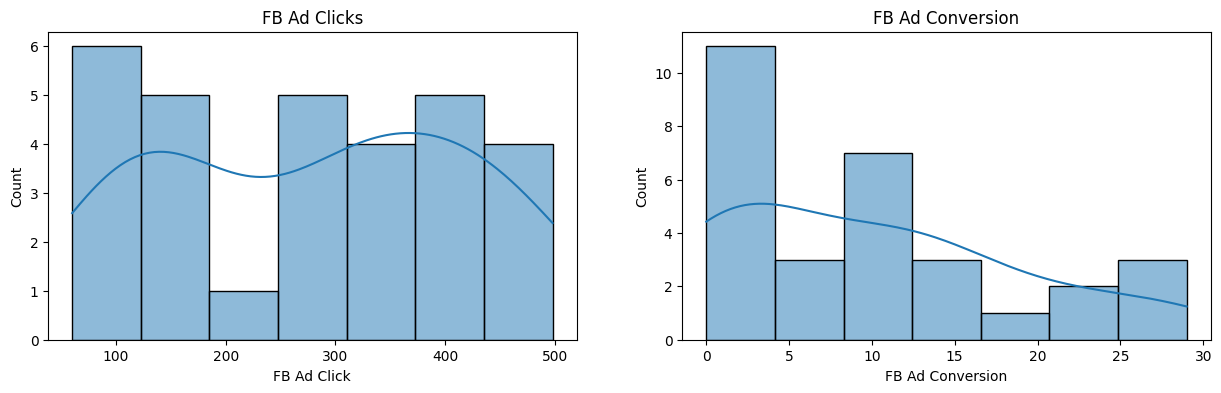

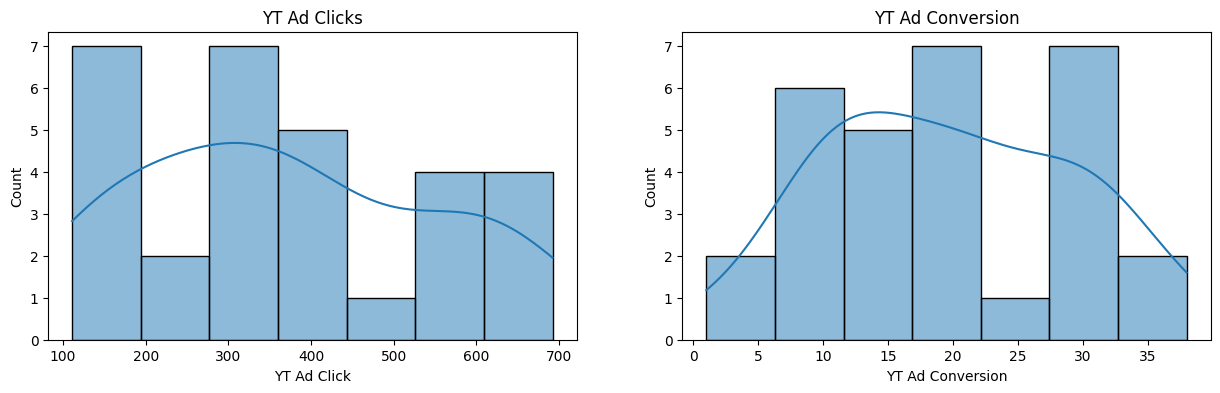

In [8]:
# FB Ad Click & Conversion histogram plot
plt.figure(figsize = (15,4))
plt.subplot(1,2,1)
plt.title('FB Ad Clicks')
sns.histplot(df['FB Ad Click'], bins=7, edgecolor = 'k', kde = True)

plt.subplot(1,2,2)
plt.title('FB Ad Conversion')
sns.histplot(df['FB Ad Conversion'], bins=7, edgecolor = 'k', kde = True)
plt.show()

# YT Ad Click & Conversion histogram plot

plt.figure(figsize = (15,4))
plt.subplot(1,2,1)
plt.title('YT Ad Clicks')
sns.histplot(df['YT Ad Click'], bins=7, edgecolor = 'k', kde = True)

plt.subplot(1,2,2)
plt.title('YT Ad Conversion')
sns.histplot(df['YT Ad Conversion'], bins = 7, edgecolor = 'k', kde = True)
plt.show()

In [9]:
df.head()

,Date,FB Add Campaign,FB Ad View,FB Ad Click,FB Ad Conversion,Cost Per FB Ad,FB Ad Click Rate,FB Conv. Rate,FB Ad Cost Per Click,Youtube Ad Campaign,YT Ad View,YT Ad Click,YT Ad Conversion,Cost per YT Ad,YT Ad Click Rate,YT Ad Conv. Rate,YT Ad Cost Per Click
0,2025-01-01,FB_Ad_camp,1266,282,11,$144.00,22.27%,11.70%,$0.51,YT_Ad_Camp,2588,189,10,$127.00,7.30%,1.59%,$0.67
1,2025-01-02,FB_Ad_camp,890,60,2,$118.00,6.74%,40.00%,$1.97,YT_Ad_Camp,4384,484,30,$143.00,11.04%,0.83%,$0.30
2,2025-01-03,FB_Ad_camp,4679,498,15,$154.00,10.64%,2.61%,$0.31,YT_Ad_Camp,3592,304,21,$95.00,8.46%,5.92%,$0.31
3,2025-01-04,FB_Ad_camp,5181,409,19,$182.00,7.89%,5.38%,$0.44,YT_Ad_Camp,625,365,31,$183.00,58.40%,10.41%,$0.50
4,2025-01-05,FB_Ad_camp,832,354,9,$167.00,42.55%,6.78%,$0.47,YT_Ad_Camp,2384,213,12,$156.00,8.93%,4.23%,$0.73


### **How frequently do we observe days with high numbers of conversions compared to days with low numbers of conversion?**

In [10]:
def create_conversion_category(value):
    try :
        category = []
        for i in df[value] :
            if i < 7 : 
                category.append('less than 7')
            elif i >= 7 and i < 15 :
                category.append('7 - 14')
            elif i >= 15 and i < 22 :
                category.append('15 - 21')
            else :
                category.append('more than 21')
        return category
    except Exception as e :
        return e 

df['FB conversion category'] = create_conversion_category('FB Ad Conversion')
df['YT conversion category'] = create_conversion_category('YT Ad Conversion')

In [11]:
df.head(2)

,Date,FB Add Campaign,FB Ad View,FB Ad Click,FB Ad Conversion,Cost Per FB Ad,FB Ad Click Rate,FB Conv. Rate,FB Ad Cost Per Click,Youtube Ad Campaign,YT Ad View,YT Ad Click,YT Ad Conversion,Cost per YT Ad,YT Ad Click Rate,YT Ad Conv. Rate,YT Ad Cost Per Click,FB conversion category,YT conversion category
0,2025-01-01,FB_Ad_camp,1266,282,11,$144.00,22.27%,11.70%,$0.51,YT_Ad_Camp,2588,189,10,$127.00,7.30%,1.59%,$0.67,7 - 14,7 - 14
1,2025-01-02,FB_Ad_camp,890,60,2,$118.00,6.74%,40.00%,$1.97,YT_Ad_Camp,4384,484,30,$143.00,11.04%,0.83%,$0.30,less than 7,more than 21


In [12]:
df[['FB Ad Conversion','FB conversion category','YT Ad Conversion','YT conversion category']].head()

,FB Ad Conversion,FB conversion category,YT Ad Conversion,YT conversion category
0,11,7 - 14,10,7 - 14
1,2,less than 7,30,more than 21
2,15,15 - 21,21,15 - 21
3,19,15 - 21,31,more than 21
4,9,7 - 14,12,7 - 14


In [13]:
df['FB conversion category'].value_counts()

FB conversion category
less than 7     14
7 - 14           7
15 - 21          5
more than 21     4
Name: count, dtype: int64

In [14]:
FB = pd.DataFrame(df['FB conversion category'].value_counts()).reset_index().rename(columns ={'FB conversion category': 'Category'})
FB

,Category,count
0,less than 7,14
1,7 - 14,7
2,15 - 21,5
3,more than 21,4


In [15]:
df['YT conversion category'].value_counts()

YT conversion category
more than 21    12
7 - 14           8
15 - 21          8
less than 7      2
Name: count, dtype: int64

In [16]:
YT = pd.DataFrame(df['YT conversion category'].value_counts()).reset_index().rename(columns = {'YT conversion category':'Category'})
YT

,Category,count
0,more than 21,12
1,7 - 14,8
2,15 - 21,8
3,less than 7,2


In [17]:
category_df = pd.merge(FB, YT, how = 'outer', on = 'Category').fillna(0)
category_df

,Category,count_x,count_y
0,15 - 21,5,8
1,7 - 14,7,8
2,less than 7,14,2
3,more than 21,4,12


In [18]:
# Category df re-arrange then dataframe

category_df = category_df.iloc[[2,1,0,3]]
category_df

,Category,count_x,count_y
2,less than 7,14,2
1,7 - 14,7,8
0,15 - 21,5,8
3,more than 21,4,12


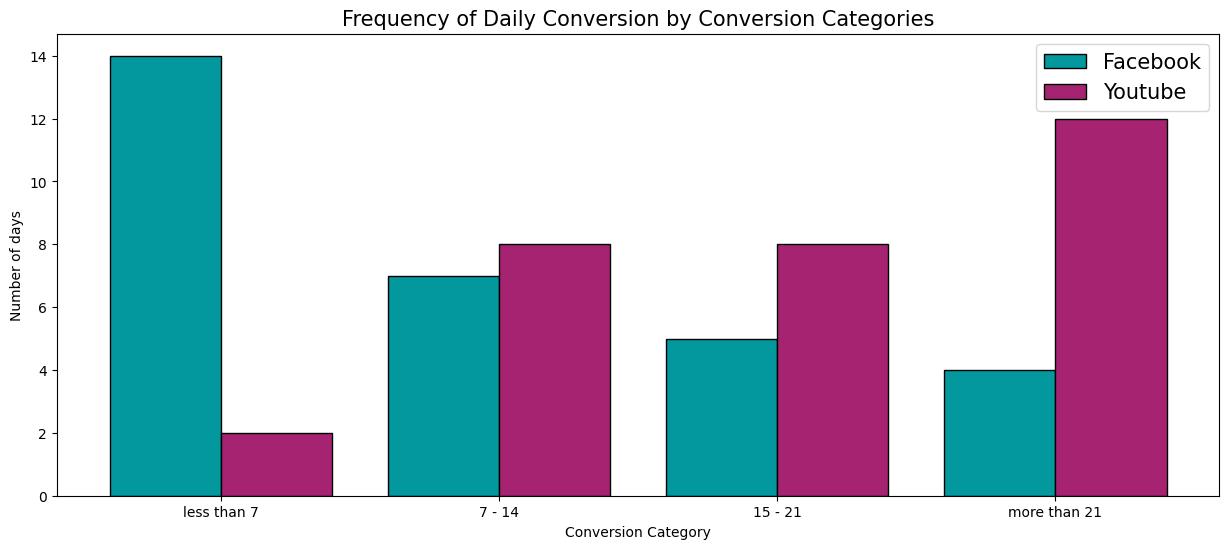

In [19]:
# ploat histogram chart 

X_axis = np.arange(len(category_df))

plt.figure(figsize = (15,6))
plt.bar(X_axis - 0.2, category_df['count_x'], 0.4, label = 'Facebook', color = '#03989E', linewidth = 1,  edgecolor = 'k')
plt.bar(X_axis + 0.2, category_df['count_y'], 0.4, label = 'Youtube', color = '#A62372', linewidth = 1,  edgecolor = 'k')

plt.xticks(X_axis, category_df['Category'])
plt.xlabel('Conversion Category')
plt.ylabel('Number of days')
plt.title("Frequency of Daily Conversion by Conversion Categories", fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

#### -The data suggests Youtube has frequent higher conversion days frequency than Facebook, which is very low conversion rates (less than 6) or modrate ones (15-21). 
#### -There is a significant variance in the number of high-conversion days between two different campaigns. 
#### -The low conversion of any days with conversions between 15-21 & more than 21 in Facebook indicates a need to review what strategies were chnaged or what external factores could have influenced these numbers. 

## **Do more clicks on the ad really leads to more sales??**

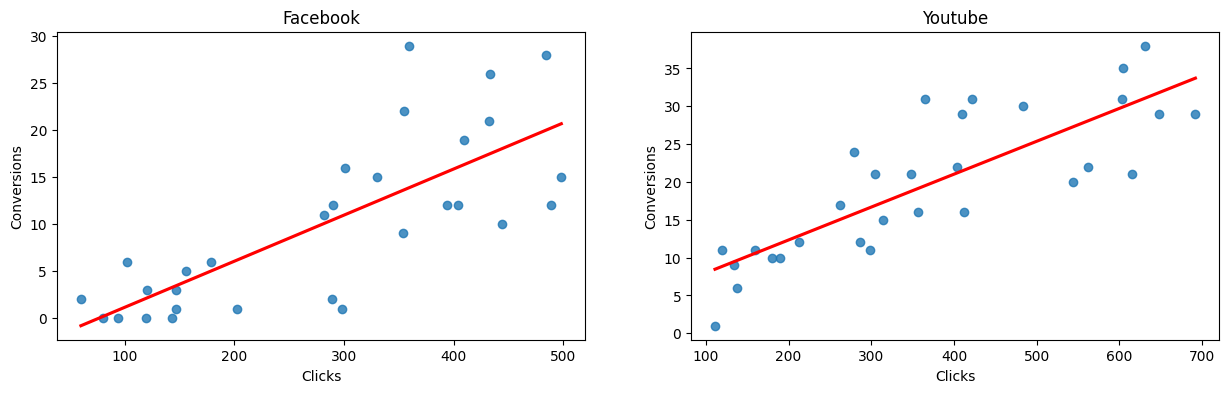

In [20]:
# by ploating the scatter chart on Clicks & conversion betwwen Facebook add & Youtube conversion

plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.title("Facebook")
sns.regplot(x= df['FB Ad Click'], y = df['FB Ad Conversion'], scatter = True, line_kws = {'color': 'red'}, order = 1, ci = None)
plt.xlabel('Clicks')
plt.ylabel('Conversions')

plt.subplot(1,2,2)
plt.title("Youtube")
sns.regplot(x = df['YT Ad Click'], y= df['YT Ad Conversion'], scatter = True, line_kws = {'color':'red'}, order = 1, ci=None )
plt.xlabel('Clicks')
plt.ylabel('Conversions')
plt.show()

**- Both graph showing positive correlation between clicks & conversion.**

**- In facebook, graph showing low positive Correlation between clicks & conversion with having more variance in clicks & conversion**

**- In Youtube, graph showing high Positive Correlation between clikcs & Conversion, More consistent relationship between clicks & conversion.**

### **Finding the Correlation between Facebook clicks & Conversion**

In [21]:
facebook_corr = df[['FB Ad Conversion','FB Ad Click']].corr()
facebook_corr

,FB Ad Conversion,FB Ad Click
FB Ad Conversion,1.00000,0.76662
FB Ad Click,0.76662,1.00000


### **Finding the Correlation between Youtube clicks & Conversion**

In [22]:
youtube_corr = df[['YT Ad Conversion','YT Ad Click']].corr()
youtube_corr

,YT Ad Conversion,YT Ad Click
YT Ad Conversion,1.000000,0.819964
YT Ad Click,0.819964,1.000000


In [23]:
print("Correlation Coeff \n -----------------------------------")
print(f"Facebook : {round(facebook_corr.values[0,1],2)}")
print(f"Youtube : {round(youtube_corr.values[0,1],2)}")

Correlation Coeff 
 -----------------------------------
Facebook : 0.77
Youtube : 0.82


****

**A Correlation coefficent 0f 0.82 indicates High Positive linear relationship between clicks on Youtube ads and sales. This suggest that as the number of clicks on Youtube ads increases, sales tend to increase as well.**

**This striong relations suggest that Youtube ads are highly effective in driving sales, as a large portion of the variation in sales can be explained by the variation in clicks on youtube ads.**

**The strong positive correlation between clicks on Youtube ads and sales suggest that Youtube advertising is highly effective in driving sales for the business. Increasing investment in youtube ads or optimizing their performance could potentially lead to even higher sales**

**A Correlation coefficent of 0.77 indicates High positive linear relationship between clicks & conversion on Facebook ads & sales. This suggest that as the number of clicks on Facebook ads increases, sales tend to increases as well but not much better than Youtube.**

**This relation suggest that Facebook ads are effective but having varience in conversions so, not highly effective in driving sales. Need to work on Facebook Ads pareamentrs for eg. ads quality, content, have to deep drive into targeted audience area etc., paramenters**

****

# **Hypothesis Testing**

**Hypothesis :** Advertising on Youtube will result in a greater number of conversions compared to advertising on Facebook

**Null Hypothesis (H0) :** "There is no differance in the number of conversion between Facebook & Youtube"

**Alternative hypothesis (H1) :** "Having some Variance in the number of conversion between facebook & youtube, Youtube is more conversion rather than facebook or Facebook hase more conversion than Youtube"

In [24]:
print("Mean Conversion \n-------------------------------------------")

print(f"Youtube : {round(df['YT Ad Conversion'].mean(),2)}")
print(f"Facebook : {round(df['FB Ad Conversion'].mean(),2)}")

Mean Conversion 
-------------------------------------------
Youtube : 19.7
Facebook : 9.97


In [25]:
t_stats, p_value = st.ttest_ind(a=df['YT Ad Conversion'], b= df['FB Ad Conversion'], equal_var = False)
print(f"T-Statistics : {t_stats}")
print(f"P-value : {p_value}")

T-Statistics : 4.096608532521963
P-value : 0.00013219153652069715


In [26]:
# Compairing the p value with significance of alpha value which is 5% or 0.05

if p_value < 0.05 :
    print("\n 'p value is less than significance value, reject the Null Hypothesis' \n")
else :
    print("\n 'p values is greater than significance value, Accept the null Hypothesis' \n")


 'p value is less than significance value, reject the Null Hypothesis' 



****
### **Insights :**

**The Mean number of conversion from Youtube ads(19.7) is substantially higher than the mean number of conversion from Facebook Ads(9.97).**

**This suggests that, on an average, youtube advertising is more effective in genrating conversion compared to Facebook advertising**

**T-Statistics (4.09) is a measure of the differance between the means of the two groups relative to the variation within the groups. T-Statistics indicates a greater differance between means of the two groups**

**the p-value(0.000) is extremly small, indicating strong evidence against the null hypothesis**
****

# **Performing Regression Analysis**

**- From Hypothesis Testing we know Youtube has more contribute in ad clicks & conversion.**

#### **- If I go with Youtube ad, How many Youtube ad conversion can I expect given a certain number of Youtube ad clicks ?**

In [27]:
# independent variable 
X = df[['YT Ad Click']]

# dependent Veriable 
Y = df[['YT Ad Conversion']]

# intializing  and fitting Linear Regression Model

reg_model = LinearRegression()
reg_model.fit(X, Y)
# print(reg_model)

prediction = reg_model.predict(X)
# print(prediction)

In [45]:
# Model Evaluation 

r2 = r2_score(Y, prediction)*100
mse = mean_squared_error(Y, prediction)
print(f"R2 Score is : {round(r2,2)} %")
print(f"Mean square error is : {round(mse,2)} ")

R2 Score is : 67.23 %
Mean square error is : 28.33 


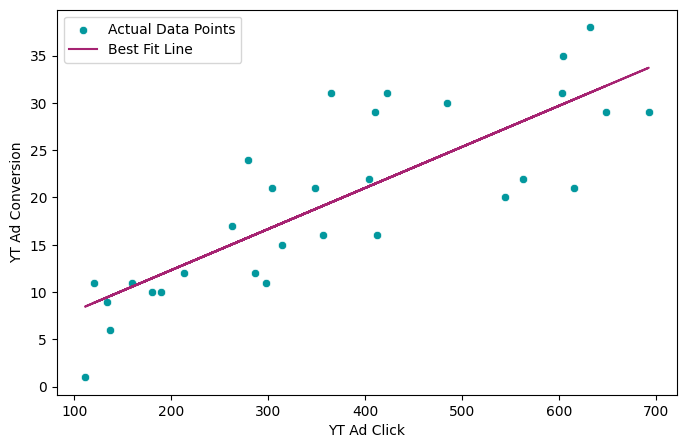

In [44]:
plt.figure(figsize = (8,5))
sns.scatterplot(x=df['YT Ad Click'], y = df['YT Ad Conversion'], color = '#03989E', label = 'Actual Data Points')
plt.plot(df['YT Ad Click'], prediction, color = '#A62372',label = 'Best Fit Line')
plt.legend()
plt.show()

## **Predicting using the regression model**

In [42]:
print(f"For {500} clicks, Expected Conversion : {round(reg_model.predict([[600]])[0][0],2)}")
print(f"For {1500} clicks, Expected Conversion : {round(reg_model.predict([[1500]])[0][0],2)}")

For 500 clicks, Expected Conversion : 29.72
For 1500 clicks, Expected Conversion : 68.83


##### **- The model has a reasonably good predictive power, with an R2 score of 67.23%. This suggests that it can be better predict Youtube ad conversion based on the number of Facebook ad clicks.**

##### **- With the insights provided by the linear Regression Model, Business can make informed decisions about resource allocation, Budget planning and campaign optimization**

##### **- For instance, knowing the expected number of Youtube Ad conversions based on a certain number of Youtube Ad clicks can help in setting realistic campaign goals, optimizing ad spend, and assessing the ROI of Youtube advertising efforts**